## Exemples avec des plongements de mots (word embeddings)

### Importation de la table d'embeddings en utilisant Gensim

In [3]:
import gensim.downloader as api
# model = api.load('glove-wiki-gigaword-300')
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


## Similarité sémantique entre les mots¶


In [4]:
model.most_similar("Trudeau")


[('Pierre_Trudeau', 0.6165754199028015),
 ('Diefenbaker', 0.6101330518722534),
 ('Jean_Chrétien', 0.6100590229034424),
 ('Ignatieff', 0.5908867716789246),
 ('Chrétien', 0.5895172953605652),
 ('Charest', 0.5866594314575195),
 ('Chretien', 0.5819708704948425),
 ('Stephen_Harper', 0.5688163042068481),
 ('Harper', 0.5630610585212708),
 ('Robichaud', 0.5625982284545898)]

In [5]:
model.most_similar("apple")


[('apples', 0.720359742641449),
 ('pear', 0.6450697183609009),
 ('fruit', 0.6410146355628967),
 ('berry', 0.6302294731140137),
 ('pears', 0.6133961081504822),
 ('strawberry', 0.6058261394500732),
 ('peach', 0.6025872230529785),
 ('potato', 0.5960935354232788),
 ('grape', 0.5935864448547363),
 ('blueberry', 0.5866668224334717)]

In [6]:
model.most_similar("Apple")


[('Apple_AAPL', 0.7456986308097839),
 ('Apple_Nasdaq_AAPL', 0.7300410270690918),
 ('Apple_NASDAQ_AAPL', 0.7175089120864868),
 ('Apple_Computer', 0.7145972847938538),
 ('iPhone', 0.6924266815185547),
 ('Apple_NSDQ_AAPL', 0.6868603825569153),
 ('Steve_Jobs', 0.6758422255516052),
 ('iPad', 0.6580768823623657),
 ('Apple_nasdaq_AAPL', 0.6444970965385437),
 ('AAPL_PriceWatch_Alert', 0.6439753770828247)]

In [7]:
model.most_similar(negative=["banana"])


[('NORWALK_CONN', 0.23768547177314758),
 ('JIM_HANNON_TimesDaily', 0.2376764416694641),
 ('KITCHENER_ONTARIO', 0.23705118894577026),
 ('DENVER_CO_PRWEB', 0.23474791646003723),
 ('GRANDE_BAY_MAURITIUS', 0.23164315521717072),
 ('Dr._Parviz_Azar', 0.22826240956783295),
 ('HuMax_IL8_TM', 0.22697211802005768),
 ('subsidiary_Airstar', 0.22571393847465515),
 ('AB_OMX_Stockholm', 0.2248857617378235),
 ('MotoTron_electronic_controls', 0.22116822004318237)]

## Quelques analogies


In [8]:
model.most_similar(positive=['woman','king'], negative=['man'])


[('queen', 0.7118192315101624),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

In [9]:
def analogie(word_1, word_2, word_3):
    # word_1 est au word_2 ce que le word_3 est au mot <valeur_retournée>
    resultats = model.most_similar(positive=[word_2,word_3], negative=[word_1])
    return resultats[0][0]

analogie("man","king","woman")


'queen'

In [10]:
analogie("paris","france","ottawa")


'ontario'

In [11]:
analogie("Paris","France","Toronto")


'Canada'

In [12]:
analogie("Paris","France","Québec")


'Quebec'

In [13]:
analogie("Apple","iOS","Microsoft")


'Windows'

In [14]:
analogie("Linux","Ubuntu","Windows")


'Windows_XP'

In [15]:
analogie("Link", "Zelda", "Luigi")


'Mario'

In [16]:
analogie("good","best","bad")


'worst'

In [17]:
model.doesnt_match(["breakfast", "cereal", "dinner", "lunch"])


C:\Users\GARIJ\AppData\Roaming\Python\Python38\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'cereal'

In [18]:
analogie("poutine","Canada","sauerkraut")


'Germany'

# Malheusement, ça ne marche pas à tout coup...


In [19]:
analogie("poutine","Canada","couscous")


'United_States'

In [20]:
analogie("Apple","iPhone","Samsung")


'handset'

## Visualisation des plongements de mots


In [21]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt 
import random 


def get_words_to_project(words, nb_additionnal=0):
    additionnal_words = []
    if nb_additionnal > 0:
        additionnal_words = random.sample(model.vocab.keys(),nb_additionnal)
    return words + additionnal_words

def get_2d_projection(model, words):
    word_vectors = np.array([model[word] for word in words])
    projected_vectors = PCA().fit_transform(word_vectors)[:,:2]
    return words, projected_vectors

def plot_2d_projection(words, vectors):
    plt.figure(figsize=(12,12))
    plt.scatter(vectors[:,0], vectors[:,1], edgecolors='k',c='r')
    for word, (x, y) in zip(words, vectors):
        plt.text(x+0.05, y+0.05, word)
        
def plot_2d_analogie(model, word_1, word_2, word_3):
    analogy_word = analogie(word_1, word_2, word_3)
    words = get_words_to_project([word_1, word_2, word_3, analogy_word], 200000)    
    words, projected_vectors = get_2d_projection(model, words)
    plot_2d_projection(words[0:4], projected_vectors[0:4])
    draw_analogie_vectors(projected_vectors)


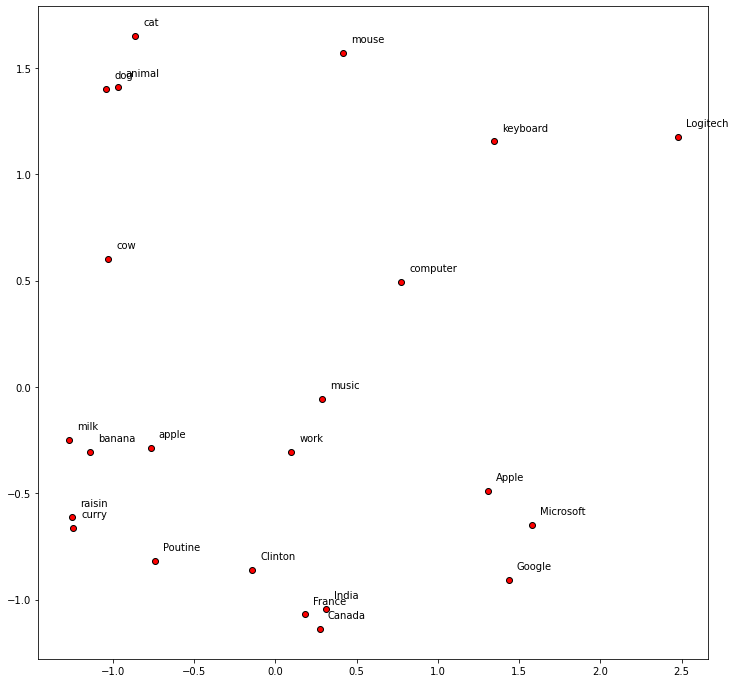

In [22]:
base_words = ["apple","banana","raisin", "computer", "Logitech","animal", "Poutine", "Clinton", "Canada", "India" ,"France", "curry", "Apple",  "Microsoft", "Google", "mouse", "keyboard","music", "cat","work", "cow", "dog", "milk"]
words_to_project = get_words_to_project(base_words, 0)

words, vectors = get_2d_projection(model, words_to_project)
plot_2d_projection(words, vectors)


## Quelques éléments intéressants


### Groupes

* Nourriture: raisin, apple, banana, milk, curry, poutine
* Animaux: cow, dog, cat, mouse, animal
* Ordinateur: computer, keyboard, mouse, apple, logitech
* Travail: work, computer, farm, music
* Compagnies: Apple, Logitech, Google, Microsoft
* Pays: Canada, India

### Ambiguïtés

* Keyboard vs computer et music
* Mouse vs computer et animal


## Certains mots sont ambigus


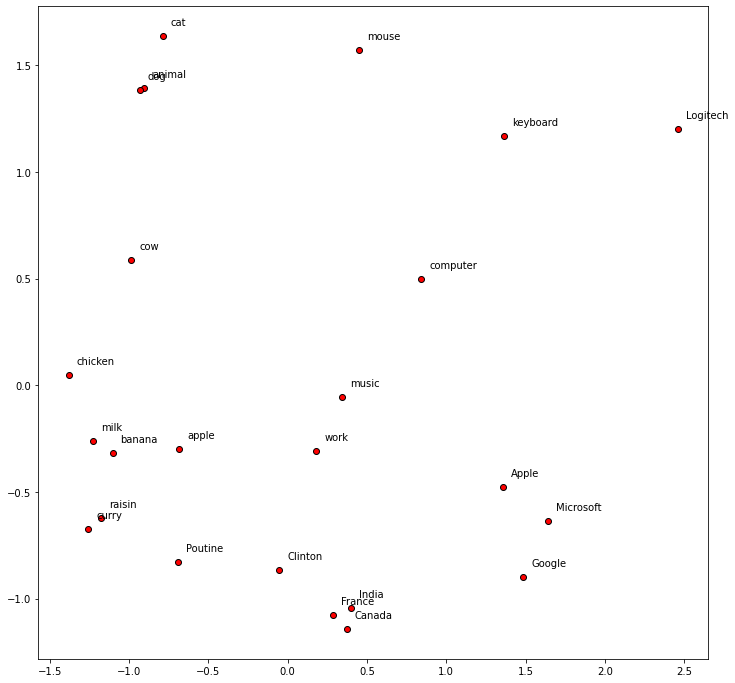

In [23]:
def add_to_base_words(new_word):
    return base_words + [new_word] if new_word not in base_words else base_words

# Quelques exemples: chicken, beef, jam, bug

new = "chicken"
base_words = add_to_base_words(new)
words_to_project = get_words_to_project(base_words, 0)
words, vectors = get_2d_projection(model, words_to_project)
plot_2d_projection(words, vectors)